In [3]:
# What version of Python do you have?
import sys
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
print(f"PyTorch Version: {torch.__version__}")
print("GPU is", "available" if torch.cuda.is_available() else "NOT AVAILABLE")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"Python {sys.version}")

PyTorch Version: 1.12.1
GPU is available
Pandas 1.4.3
Scikit-Learn 1.1.1
Python 3.10.4 (main, Mar 31 2022, 08:41:55) [GCC 7.5.0]


In [2]:
# Reading data and showing a sample
df=pd.read_csv("diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
69,4,146,85,27,100,28.9,0.189,27,0
750,4,136,70,0,0,31.2,1.182,22,1
683,4,125,80,0,0,32.3,0.536,27,1
723,5,117,86,30,105,39.1,0.251,42,0
252,2,90,80,14,55,24.4,0.249,24,0


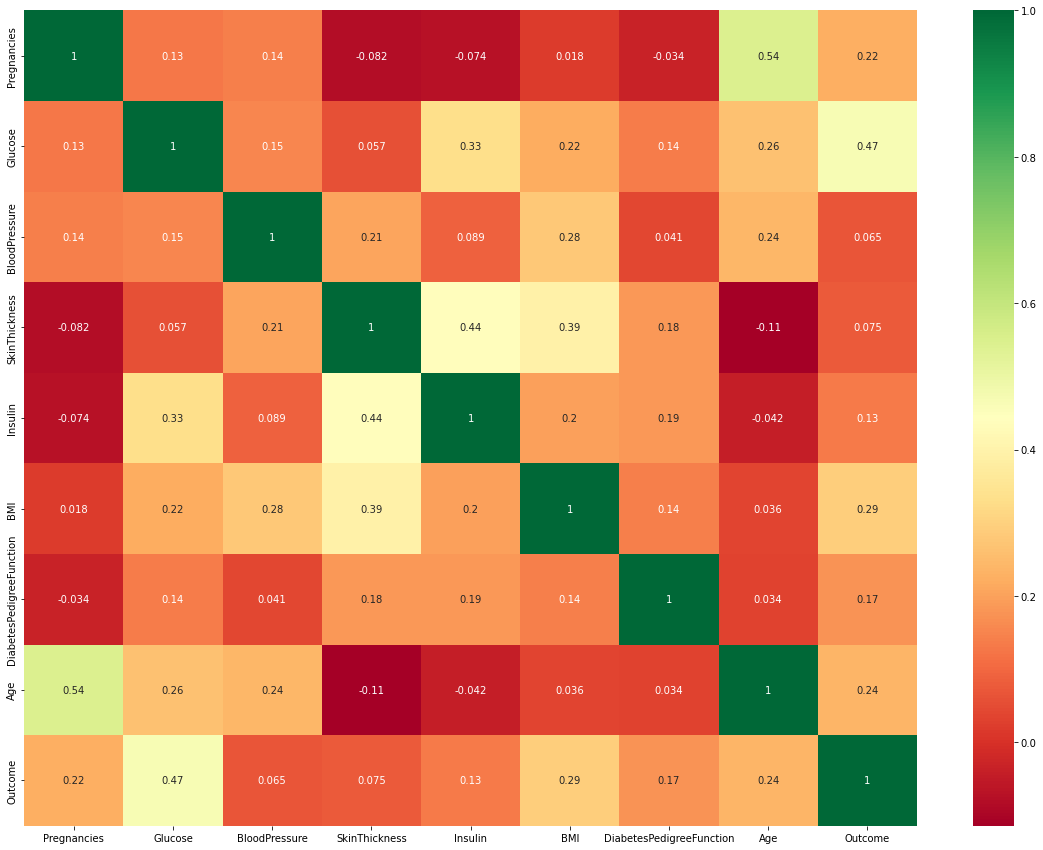

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [51]:
# Split data
import  numpy as np
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values
y= np.array(y, dtype='float64')

In [52]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [53]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape)

(614, 8) (154, 8)


In [55]:
X_train=torch.Tensor(X_train)
X_test=torch.Tensor(X_test)
y_train=torch.Tensor(y_train)
y_test=torch.Tensor(y_test)
print(X_train.shape)
print(y_train.shape)
print('----------')
print(X_test.shape)
print(y_test.shape)
print('----------')
print(type(X_train))

torch.Size([614, 8])
torch.Size([614])
----------
torch.Size([154, 8])
torch.Size([154])
----------
<class 'torch.Tensor'>


In [68]:
# create model
import  torch.nn as nn
class Model(torch.nn.Module) :
    def __init__(self):
        super(Model,self).__init__()
        self.fc1=torch.nn.Linear(X.shape[1],6)
        self.fc2=torch.nn.Linear(6,3)
        self.fc3=torch.nn.Linear(3,2)
        self.sigmoid=torch.nn.Sigmoid()
    def forward(self,x):
        out=self.fc1(x)
        out=self.sigmoid(out)
        out=self.fc2(out)
        out=self.sigmoid(out)
        out=self.fc3(out)
        return out

In [69]:
net=Model()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.01)

In [70]:
def train_mlp(model,x1_train,y1_train,cretria,optimizer):
    model.train()
    runningloss=0.0
    runningcorrects=0.0
    outputs=model(x1_train)
    loss=cretria(outputs,y1_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    max_scores,preds=torch.max(outputs,dim=1)
    runningloss +=loss.item()*x1_train.size(0)
    runningcorrects += torch.sum(preds==y1_train.data)
    epoch_loss=runningloss/len(x1_train)
    epoch_acc=runningcorrects/len(x1_train)
    return epoch_acc,epoch_loss
def eval_MLP(model,x1_test,y1_test,criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0.0
    outputs=model(x1_test)
    loss=criterion(outputs,y1_test)
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item() * x1_test.size(0)
    running_corrects += torch.sum(preds == y1_test.data)
    epoch_loss = running_loss / len(X_test)
    epoch_acc = running_corrects/ len(X_test)
    return epoch_acc,epoch_loss

In [71]:
final_losses=[]
final_accuarcy = []
preds = []
test_losses = []
test_accuarcy = []
for i in range(X_train.size(0)):
    i= i+1
    epoch_acc, epoch_loss = train_mlp( net, X_train, y_train, loss_function,optimizer)
    final_losses.append(epoch_loss)
    final_accuarcy.append(epoch_acc)
    test_acc,test_loss = eval_MLP(net,X_test,y_test,loss_function)
    test_losses.append(test_loss)
    test_accuarcy.append(test_acc)

    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,epoch_loss))
        print("Epoch number: {} and the accuarcy : {}".format(i,100*epoch_acc))


Epoch number: 1 and the loss : 0.715514600276947
Epoch number: 1 and the accuarcy : 33.876220703125
Epoch number: 11 and the loss : 0.6453652381896973
Epoch number: 11 and the accuarcy : 66.123779296875
Epoch number: 21 and the loss : 0.6376574635505676
Epoch number: 21 and the accuarcy : 66.123779296875
Epoch number: 31 and the loss : 0.634773850440979
Epoch number: 31 and the accuarcy : 66.123779296875
Epoch number: 41 and the loss : 0.6274298429489136
Epoch number: 41 and the accuarcy : 66.123779296875
Epoch number: 51 and the loss : 0.6180091500282288
Epoch number: 51 and the accuarcy : 66.123779296875
Epoch number: 61 and the loss : 0.6015717387199402
Epoch number: 61 and the accuarcy : 66.123779296875
Epoch number: 71 and the loss : 0.5770953893661499
Epoch number: 71 and the accuarcy : 66.123779296875
Epoch number: 81 and the loss : 0.5465600490570068
Epoch number: 81 and the accuarcy : 71.00977325439453
Epoch number: 91 and the loss : 0.517351508140564
Epoch number: 91 and the 

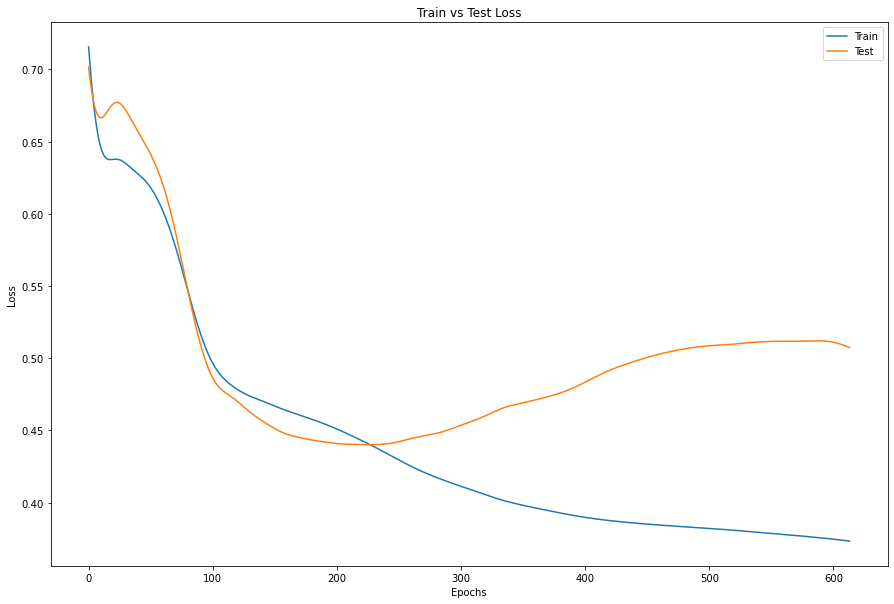

In [72]:
plt.figure(figsize=(15,10))
plt.plot(range(X_train.size(0)),final_losses )
plt.plot(range(X_train.size(0)),test_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Train vs Test Loss')
plt.show()

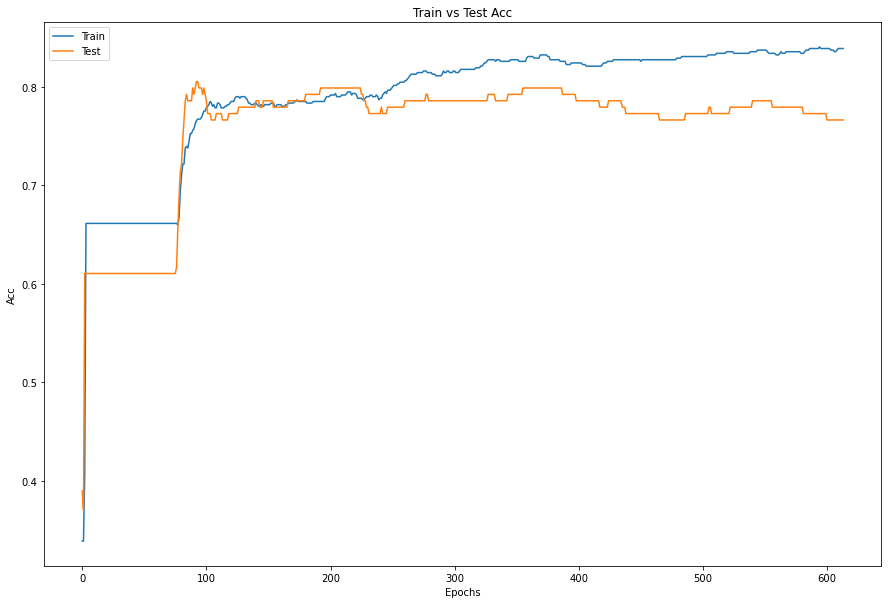

In [73]:
plt.figure(figsize=(15,10))
plt.plot(range(X_train.size(0)),final_accuarcy)
plt.plot(range(X_train.size(0)),test_accuarcy)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['Train','Test'])
plt.title('Train vs Test Acc')
plt.show()

In [74]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = net(data)
        predictions.append(y_pred.argmax().item())

Text(69.0, 0.5, 'Predicted')

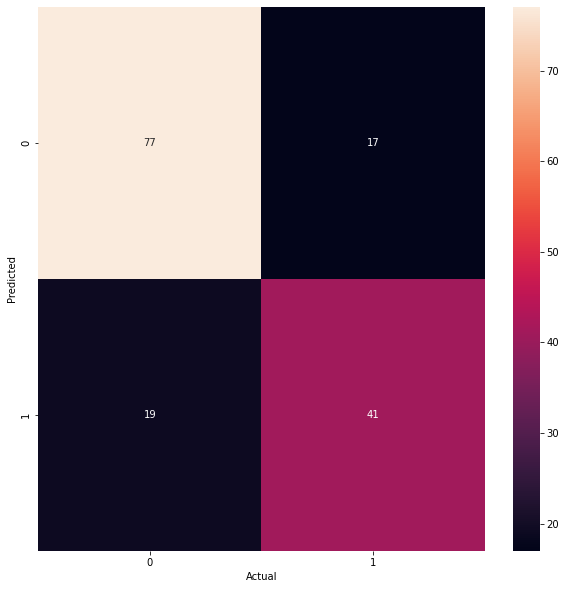

In [77]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')